**Ex4: UnSupervised Learning**
---

Elad David (206760274) & Inbar Shmaya (208774026)

In [10]:
import math
import random
import sys
from copy import deepcopy
from google.colab import drive


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

epsilon = 0.0000001  # 10 ^ -8

#**Section A:** Create data

In [11]:
def createClass(mean, cov, size):
  
  df = np.random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
  x, y = np.random.multivariate_normal(mean, cov, size).T
  return x, y

# Create 3 class:
mean = [1, 2]
cov = [[1, 0], [0, 100]]
size = 1000
x1, y1 = createClass(mean, cov, size)

mean = [10, 30]
cov = [[93, 0], [0, 13]]
size = 500
x2, y2 = createClass(mean, cov, size)

mean = [35, 0]
cov = [[75, 0], [0, 100]]
size = 700
x3, y3 = createClass(mean, cov, size)

#**Section B:** Restore the cov matrix and the mean of the input

*Note that:*

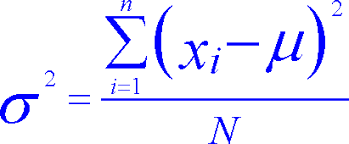



In [12]:
Uj = [0, 0]   # mean-dot: (x,y)
size = 1000   # The size of the first class of the input
for i in range (size):
  Uj[0] += x1[i]
  Uj[1] += y1[i]
Uj[0] = Uj[0] / size
Uj[1] = Uj[1] / size
print("The mean of the first class: \n" , Uj)



matrix_Uj = np.asmatrix(Uj)  # numpy.asmatrix -> Interpret the input as a matrix
sum = 0 
for i in range (size):
    Xt = np.asmatrix([x1[i], y1[i]])
    sum += ((Xt - matrix_Uj).T * (Xt - matrix_Uj)) /size
print("\n\nThe covariance matrix of the first class: \n" , sum) # (sum_of:(Xj - U)^2)/m, as the equsion above

The mean of the first class: 
 [0.9441767449392142, 2.267115470385834]


The covariance matrix of the first class: 
 [[ 9.56063919e-01 -7.77364680e-02]
 [-7.77364680e-02  1.00424965e+02]]


#**Section C:** Draw the data

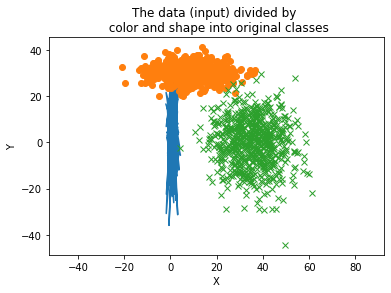

In [13]:
plt.plot(x1, y1)
plt.plot(x2, y2, 'o')
plt.plot(x3, y3, 'x')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The data (input) divided by \n color and shape into original classes')
plt.show()

#Price Function
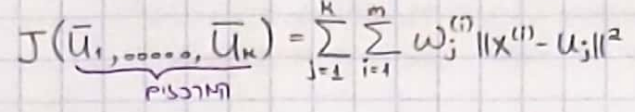

In [14]:
def Price_Function(X, Y, Kth_point, W):
  """
  Calc the price for the k-th mean
  """
  sum = 0 # Price (result of the price function)
  for j in range(len(Kth_point)): # For each k
    for i in range(len(X)): # Each sample
      a = [0, 0]
      a[0] = X[i] - Kth_point[j][0]
      a[1] = Y[i] - Kth_point[j][1] 

      norm2 = 0
      norm2 += math.pow(a[0], 2)
      norm2 += math.pow(a[1], 2)
      
      sum += norm2 * W[i][j] # Add to sum just if belongs to the class k
  return sum

#**Section D:** Use **K-Means** algorithm to find the different classes



In [15]:
def K_Means (k, X, Y, num_of_iterations = 100):

  # Initalization: Choose K random points for centers
  current_means = np.zeros((k, 2))
  W = np.zeros((len(X), k)) 
  distances = np.zeros((len(X), k)) 
   
  # Initialize random means
  for i in range(k):
    random_sample = random.randint(0, len(X) - 1)
    current_means[i][0] = X[random_sample]
    current_means[i][1] = Y[random_sample]

  # Use to find the min price function (J(means))
  # For each iter- calc J(mean). If it's smaller than the current min- update the min_mean.
  # At the end, return the min_mean
  min_mean = current_means, W
  min_mean_price = 10**20 # Initialize to a big number
  
  iter = 0
  while iter < num_of_iterations:

    W = np.zeros((len(X), k))
   
    # Phase 1: Calculate the distances from each mean and classify the samples into temporary classes  
    # distanecs[i][j] = distance of the i-th sample from j-th mean
    for i in range(len(X)):
      for j in range(k):
        distances[i][j] = math.sqrt((np.square(X[i] - current_means[j][0])) + (np.square(Y[i] - current_means[j][1])))  # Norma 2
    # For each sample, find the minimum distance from a mean-point and update it in W array
    for x in range(len(distances)):
      index = 0
      for i in range(k):  # Each row of the array 'distances' has k columns, each represents the distance from the current k-mean 
        if distances[x][i] < distances[x][index]:
          index = i
      W[x][index] = 1


    # Phase 2: Calculate J(means) and check if it's the min price
    current_price = Price_Function(X, Y, current_means, W)
    if current_price < min_mean_price:
      min_mean_price = current_price
      min_mean = current_means, W 

    # Phase 3: Update next means points
    for i in range(k):
      samples_in_class = 0
      corrected_X = 0
      corrected_Y = 0
      for j in range(len(X)):
        samples_in_class += W[j][i] # if in class -> increase by 1; else -> remain the same
        corrected_X += X[j] * W[j][i]
        corrected_Y += Y[j] * W[j][i]
      corrected_X = corrected_X / samples_in_class
      corrected_Y = corrected_Y / samples_in_class
      current_means[i][0] = corrected_X
      current_means[i][1] = corrected_Y
    
   
    iter += 1

  return min_mean

In [16]:
X = []
X = np.append(X, x1)
X = np.append(X, x2)
X = np.append(X, x3)
Y = []
Y = np.append(Y, y1)
Y = np.append(Y, y2)
Y = np.append(Y, y3)

K = 10
price_function = np.zeros(K)
price_function[0] = None # k=0 not exists
for i in range (1, K): 
  means , W = K_Means(i, X, Y) # Get the min price mean of 100 iteretions

  # Update price function:
  price_function[i] = Price_Function(X, Y, means, W)

print(price_function)

[             nan 1105809.87176638  560797.78963321  264267.77827102
  217795.56176378  175036.84053979  132947.46499213  109417.24401094
  112690.29832205   89307.81802883]


Elbow-Method:

Prices value for K's from 0 to 9: [             nan 1105809.87176638  560797.78963321  264267.77827102
  217795.56176378  175036.84053979  132947.46499213  109417.24401094
  112690.29832205   89307.81802883]




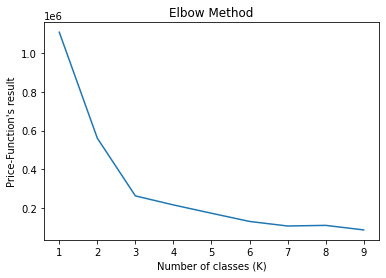

In [17]:
print("Prices value for K's from 1 to 9:", price_function)
print("\n")
 
plt.plot(price_function)
plt.xlabel('Number of classes (K)')
plt.ylabel("Price-Function's result")
plt.title('Elbow Method')
plt.show()

#**Discussion & Conoclusions:**

**The "elbow method" explained:**

The method's assumption point is that it doesn't known how many classes does the input classify to.

X axis rpresents the number of classes that is considered.
As you can see, the graaph is descrete and not continuous, because the number of classes has to be a natural number (integer higher than 0).

Y axis represents the price function result for each number of classes.
Price function calculates the sum of the distances of every sample from its mean point that represents its class, for each class.

A rule of thumb is that the higher the number of the classes, the lower the result of the price function (correct until the number of classes equals the number of samples, aka number of rows at the X matrix created on the first section of this excercise; that is because in this case, every individual sample belongs to a unique class, and the distance between a sample to itself is 0, therefore the result of the price function from this point equals 0 [the sum of all classes is 0]).

According to this rule, we predicting that as we go right on the X axis, the value of the Y axis gets lower, which actually happens. 

---


**Analysing the results of the "elbow method":**

As we analys the "elbow method"'s results, we should choose the cordinate which from this one and on, adding a mean point for another class is no longer worth the additional cost. This means we should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. 

On the graph above, there is a drastic sharp slope between the second and the third points from left, which means that a major and sagnificant change and accurancy is made there. That means that the third class added to the algorithm is very sagnificant and decreasing the price function in accordance.

As described before, **the number of classes is probably 3** for this specific input.

From this point on, the graph is on negative slope (but this one we could predict), but also is has blunter slope; it means that the improvement is not sagnificant as it was before.

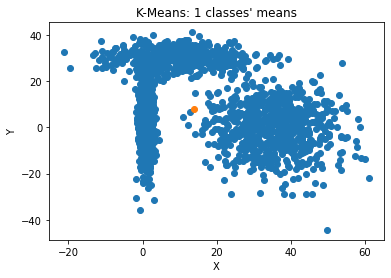

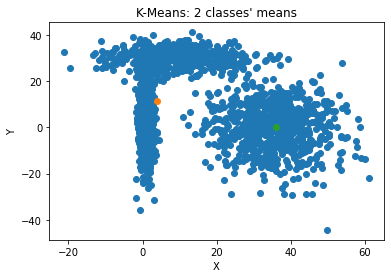

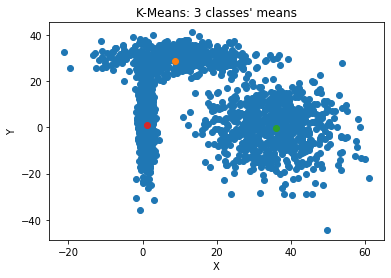

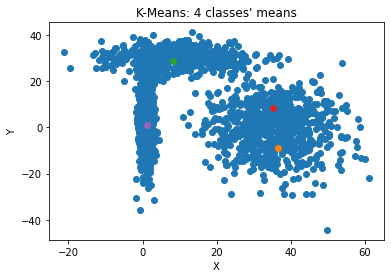

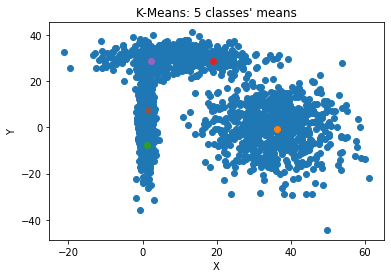

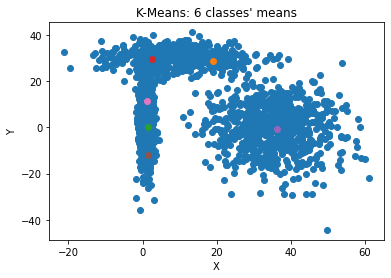

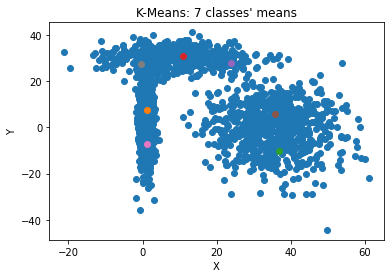

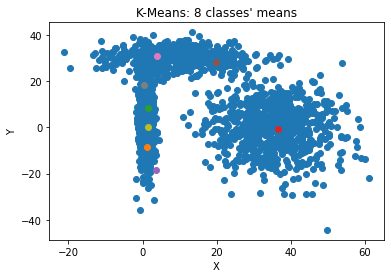

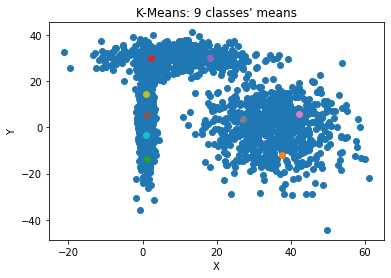

In [18]:
K = 10
for i in range (1, K): 
  means , W = K_Means(i, X, Y) # Get the min price mean of 100 iteretions
  plt.scatter(X,Y)
  
  for j in range(0, len(means)):
    plt.scatter(means[j][0], means[j][1])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title("K-Means: %d classes' means" %(i))
  plt.show()
  print()